$$\dot \rho = f(\rho)(\rho-g(\rho,u))$$

where we have 
- $\rho = x$
- $ u=\lambda$
- $f(\rho) = - x^2$
- $ g(\rho, u)= \frac{1}{x}(\frac{\lambda}{x}+1)$

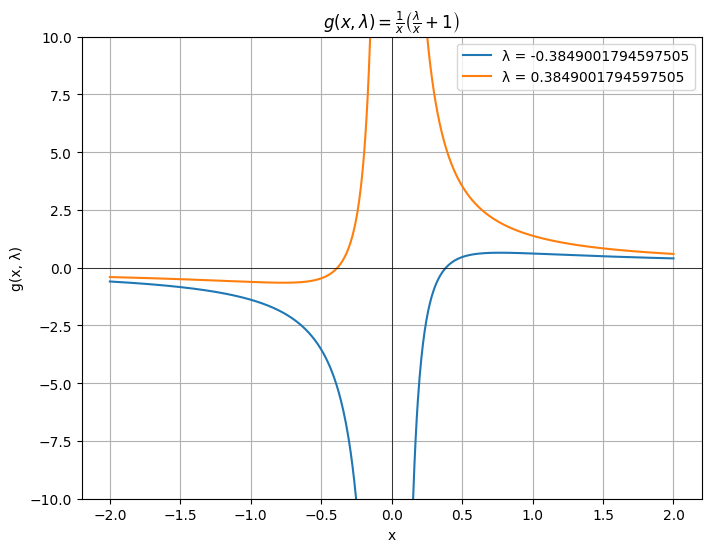

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def g(x, lam):
    return (1/x) * (lam/x + 1)

# Define x range avoiding zero
x = np.linspace(-2, 2, 1000)
x = x[np.abs(x) > 1e-2]  # avoid division by zero near x=0

# Values of lambda to plot
lambda_vals = [-1, -np.sqrt(4/27), 0, np.sqrt(4/27), 1]
lambda_vals = [-np.sqrt(4/27), np.sqrt(4/27)]

plt.figure(figsize=(8,6))
for lam in lambda_vals:
    y = g(x, lam)
    plt.plot(x, y, label=f"λ = {lam}")

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.ylim(-10, 10)
plt.title(r"$g(x, \lambda) = \frac{1}{x} \left( \frac{\lambda}{x} + 1 \right)$")
plt.xlabel("x")
plt.ylabel("g(x, λ)")
plt.legend()
plt.grid(True)
plt.show()


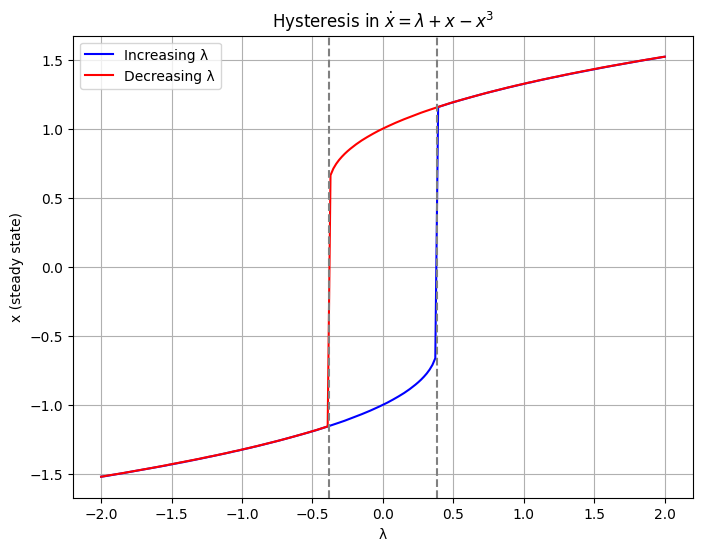

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def hysteresis_ode(t, x, lam):
    return lam + x - x**3

def simulate_branch(lam_values, x0):
    x_vals = []
    x_curr = x0
    for lam in lam_values:
        sol = solve_ivp(hysteresis_ode, [0, 50], [x_curr], args=(lam,), t_eval=[50])
        x_curr = sol.y[0, -1]  # final value
        x_vals.append(x_curr)
    return np.array(x_vals)

# Sweep lambda up and down
end_point = np.sqrt(4/27)+0.1
end_point = 2
lam_up = np.linspace(-2, end_point, 200)
lam_down = np.linspace(end_point, -2, 200)

x0 = -1.5  # initial condition

x_up = simulate_branch(lam_up, x0)
x_down = simulate_branch(lam_down, x_up[-1])  # continue from where we left off

# Plotting the hysteresis loop
plt.figure(figsize=(8,6))
plt.plot(lam_up, x_up, label='Increasing λ', color='blue')
plt.plot(lam_down, x_down, label='Decreasing λ', color='red')
plt.axvline(np.sqrt(4/27), color='gray', linestyle='--')
plt.axvline(-np.sqrt(4/27), color='gray', linestyle='--')
plt.xlabel("λ")
plt.ylabel("x (steady state)")
plt.title("Hysteresis in $\dot{x} = \lambda + x - x^3$")
plt.legend()
plt.grid(True)
plt.show()


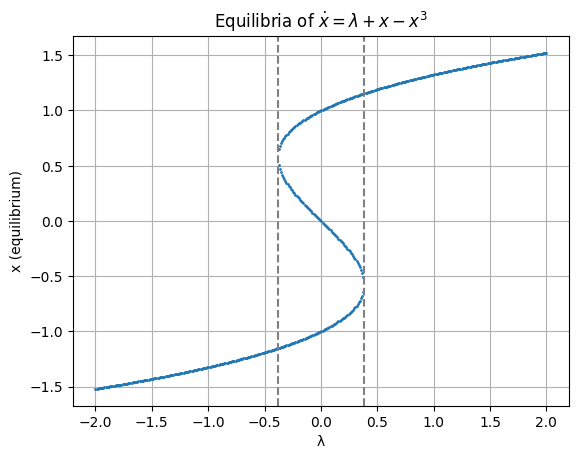

In [2]:
import numpy as np
import matplotlib.pyplot as plt

lam = np.linspace(-2, 2, 400)
x_vals = []

for l in lam:
    roots = np.roots([1, 0, -1, -l])  # x^3 - x - lam
    real_roots = roots[np.isreal(roots)].real
    for r in real_roots:
        x_vals.append((l, r))

lam_plot, x_plot = zip(*x_vals)
plt.plot(lam_plot, x_plot, '.', markersize=2)
plt.axvline(np.sqrt(4/27), color='gray', linestyle='--')
plt.axvline(-np.sqrt(4/27), color='gray', linestyle='--')
plt.title("Equilibria of $\dot{x} = \lambda + x - x^3$")
plt.xlabel("λ")
plt.ylabel("x (equilibrium)")
plt.grid(True)
plt.show()
